<a href="https://colab.research.google.com/github/vinhpeters/tf-exam/blob/main/02_neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to neural network classification

## Creating example data

In [ ]:
from sklearn.datasets import make_circles
import tensorflow as tf

In [ ]:
n_samples = 1000
X ,y = make_circles(n_samples, noise = 0.03, random_state=42)

In [ ]:
X, y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [ ]:
import pandas as pd


In [ ]:
circles = pd.DataFrame({'X0': X[:,0], 'X1':X[:,1], 'label': y})

In [ ]:
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [ ]:
import matplotlib.pyplot as plt


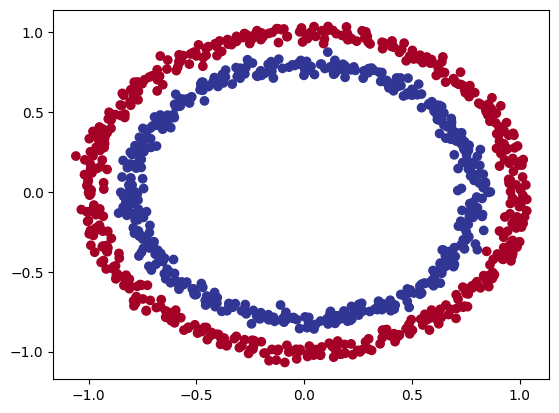

In [ ]:
plt.scatter(X[:,0], X[:,1], c = y, cmap=plt.cm.RdYlBu)

## Input and output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
len(X),len(y)

(1000, 1000)

In [ ]:
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

## Building the model

In [ ]:
tf.random.set_seed(42)


In [ ]:
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.SGD(), metrics=['accuracy'] )

model_1.fit(X,y, epochs =5)

Epoch 1/5
32/32 [==============================] - 3s 21ms/step - loss: 6.1813 - accuracy: 0.4820
Epoch 2/5
32/32 [==============================] - 1s 17ms/step - loss: 6.0421 - accuracy: 0.4940
Epoch 3/5
32/32 [==============================] - 0s 13ms/step - loss: 5.0711 - accuracy: 0.4740
Epoch 4/5
32/32 [==============================] - 0s 10ms/step - loss: 4.1909 - accuracy: 0.4750
Epoch 5/5
32/32 [==============================] - 0s 8ms/step - loss: 1.8737 - accuracy: 0.4880


In [ ]:
# No better than guessing
model_1.fit(X,y, epochs = 200, verbose = 0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [ ]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.SGD(), metrics=['accuracy'] )

model_2.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.6924 - accuracy: 0.4830
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 2.9955 - accuracy: 0.4860
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7458 - accuracy: 0.4900
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7077 - accuracy: 0.4920
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6982 - accuracy: 0.4850
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.4740
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.4990
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4850
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.5090
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4640
Epoch 11/

In [ ]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932998299598694, 0.5]

## Improving the model

In [ ]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.Adam(), metrics=['accuracy'] )

model_3.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 3.5897 - accuracy: 0.4620
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 1.5489 - accuracy: 0.4610
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7551 - accuracy: 0.4250
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7415 - accuracy: 0.4830
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7314 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7230 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7163 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7114 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7069 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7034 - accuracy: 0.5000
Epoch 11/

In [ ]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.5000


[0.6933599710464478, 0.5]

In [ ]:
y_preds=model_3.predict(X)

32/32 [==============================] - 0s 1ms/step


In [ ]:
import numpy as np


In [ ]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decison boundary created by a model predicting on X
  """
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max()+0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max()+0.1
  xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),np.linspace(y_min,y_max, 100))

  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print('multiclass')
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    y_pred= np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx,yy,y_pred, cmap=plt.cm.RdYlBu)
  plt.scatter(X[:,0], X[:,1],c=y,s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step


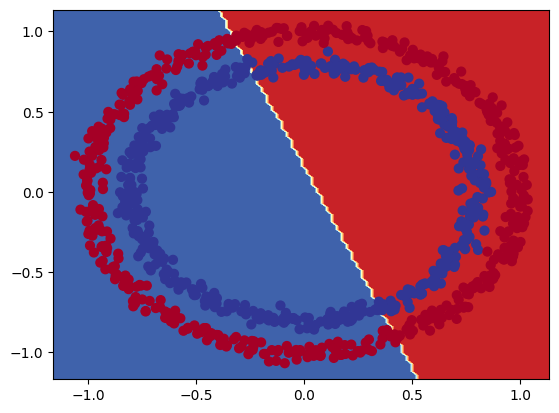

In [ ]:
plot_decision_boundary(model_3, X, y)

In [ ]:

X_regression=tf.range(0,1000,5)

y_regression=tf.range(100,1100,5)

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]

y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [ ]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(None,1)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics=['mae'] )
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 389.3524 - mae: 389.3524
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 296.6480 - mae: 296.6480
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 264.1174 - mae: 264.1174
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 256.2760 - mae: 256.2760
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 265.0196 - mae: 265.0196
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 262.7911 - mae: 262.7911
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 254.8104 - mae: 254.8104
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 253.2838 - mae: 253.2838
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 258.8942 - mae: 258.8942
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 257.4596 - mae: 257.4596
Epoch 11/100
5/5 [=====================

In [ ]:
y_reg_preds = model_3.predict(tf.expand_dims(X_reg_test, axis=-1))

2/2 [==============================] - 0s 4ms/step


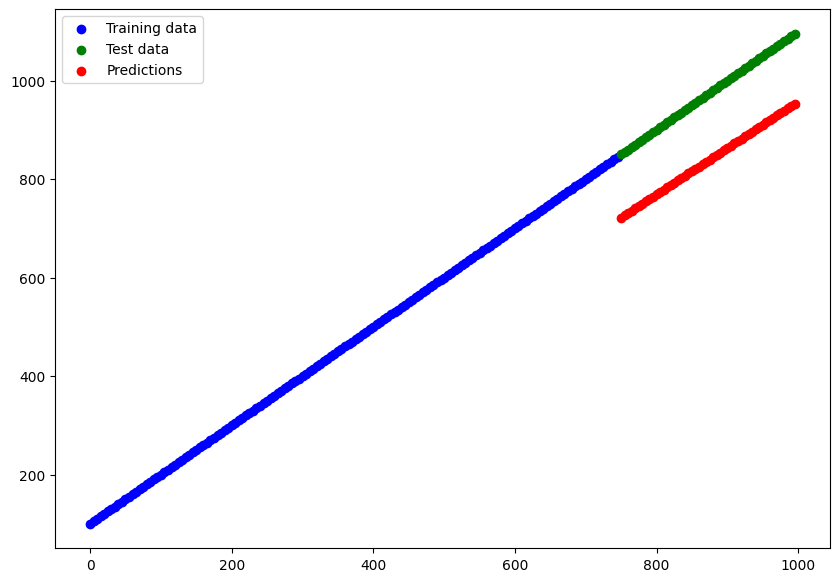

In [ ]:
plt.figure(figsize=(10,7))

plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data' )
plt.scatter(X_reg_test, y_reg_test, c='g', label='Test data' )
plt.scatter(X_reg_test, y_reg_preds, c='r', label='Predictions' )
plt.legend();

## Non-linearity

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential ([
    tf.keras.layers.Dense(1, activation = 'linear')
])

model_4.compile(loss='binary_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) , metrics =['accuracy'])
model_4.fit(X,y ,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 6.0676 - accuracy: 0.4900
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0106 - accuracy: 0.4900
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9865 - accuracy: 0.4900
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9827 - accuracy: 0.4900
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9711 - accuracy: 0.4900
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9666 - accuracy: 0.4890
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9658 - accuracy: 0.4890
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9687 - accuracy: 0.4890
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9746 - accuracy: 0.4880
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9749 - accuracy: 0.4880
Epoch 11/

313/313 [==============================] - 0s 1ms/step


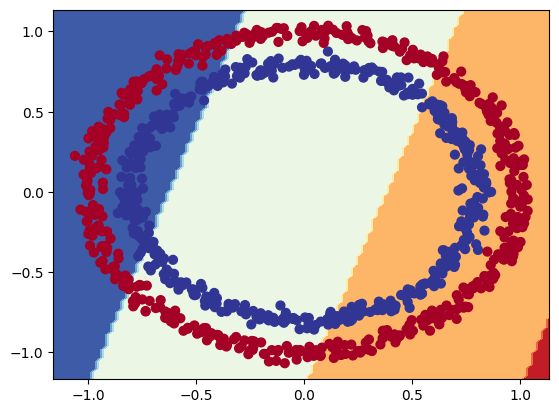

In [ ]:
plot_decision_boundary(model_4, X, y)

## Non-linear activiation

In [ ]:
tf.random.set_seed(42)
model_5 = tf.keras.Sequential ([
    tf.keras.layers.Dense(1, activation = 'relu')
])

model_5.compile(loss='binary_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) , metrics =['accuracy'])
history = model_5.fit(X,y ,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 6.0453 - accuracy: 0.4860
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0392 - accuracy: 0.4860
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0362 - accuracy: 0.4860
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0174 - accuracy: 0.4860
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0124 - accuracy: 0.4830
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0087 - accuracy: 0.4830
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0078 - accuracy: 0.4830
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0067 - accuracy: 0.4830
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0058 - accuracy: 0.4830
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0050 - accuracy: 0.4830
Epoch 11/

In [ ]:
tf.random.set_seed(42)
model_6 = tf.keras.Sequential ([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_6.compile(loss='binary_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) , metrics =['accuracy'])
history = model_6.fit(X,y ,epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 4ms/step - loss: 0.7390 - accuracy: 0.4980
Epoch 2/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7240 - accuracy: 0.4970
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7150 - accuracy: 0.4930
Epoch 4/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7098 - accuracy: 0.4910
Epoch 5/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7063 - accuracy: 0.4900
Epoch 6/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7040 - accuracy: 0.4900
Epoch 7/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7017 - accuracy: 0.4960
Epoch 8/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6997 - accuracy: 0.4960
Epoch 9/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6978 - accuracy: 0.4980
Epoch 10/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6961 - accuracy: 0.4970
Epoch 11/

In [ ]:
model_6.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0635 - accuracy: 0.9960


[0.06347420811653137, 0.9959999918937683]

313/313 [==============================] - 1s 1ms/step


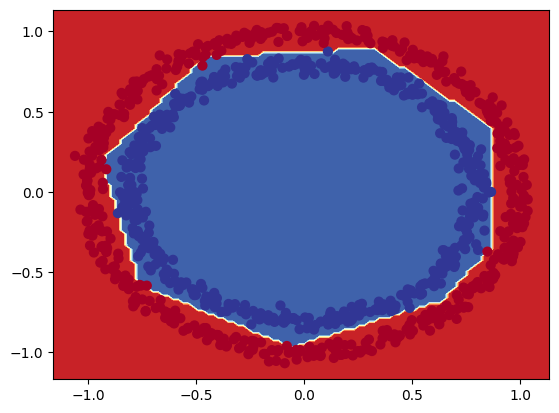

In [ ]:
plot_decision_boundary(model_6, X, y)

In [ ]:
tf.random.set_seed(42)
model_7 = tf.keras.Sequential ([
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_7.compile(loss='binary_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) , metrics =['accuracy'])
history = model_7.fit(X,y ,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.7142 - accuracy: 0.4970
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7070 - accuracy: 0.4880
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7030 - accuracy: 0.4820
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7008 - accuracy: 0.4850
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6992 - accuracy: 0.4820
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.4600
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6963 - accuracy: 0.4770
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.4770
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.4820
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.4550
Epoch 11/

313/313 [==============================] - 0s 1ms/step


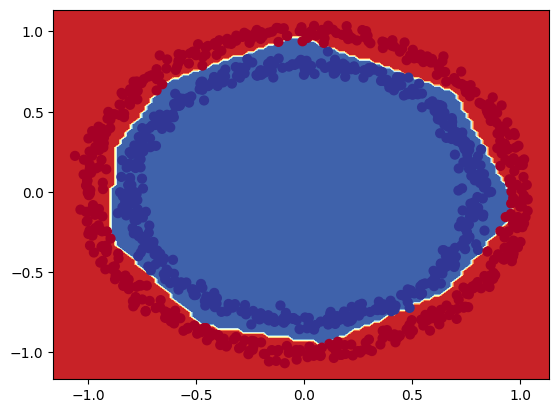

In [ ]:
plot_decision_boundary(model_7,X,y)

In [ ]:
A= tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

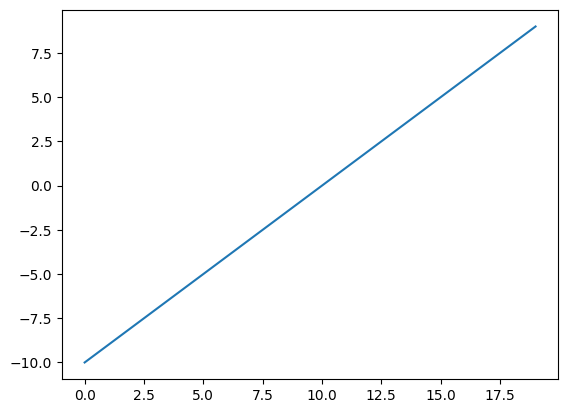

In [ ]:
plt.plot(A);

In [ ]:
def sigmoid(x):
  return 1 / (1+tf.exp(-x))
  

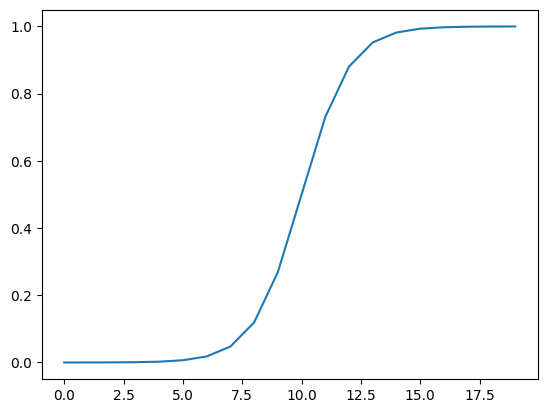

In [ ]:
plt.plot(sigmoid(A));

In [ ]:
def relu(x):
  return tf.maximum(x,0)

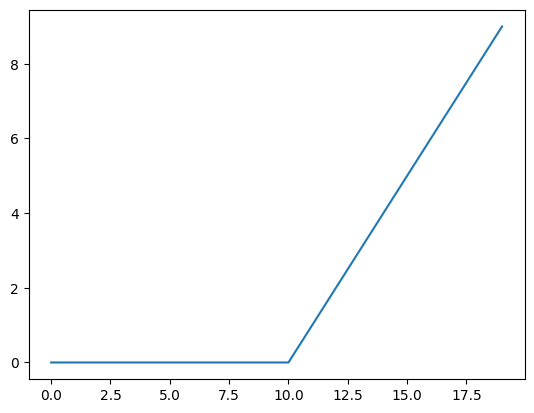

In [ ]:
plt.plot(relu(A));

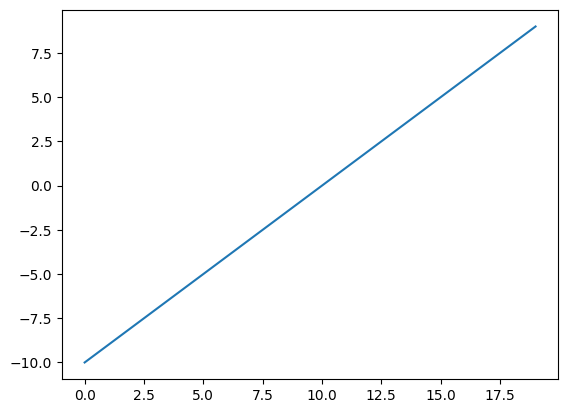

In [ ]:
plt.plot(tf.keras.activations.linear(A));

## Evaluating and improving our classfication

In [ ]:
len(X)

1000

In [ ]:
# Create training and test set

X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

In [ ]:
X_train.shape,y_train.shape, X_test.shape, y_test.shape 


((800, 2), (800,), (200, 2), (200,))

In [ ]:
tf.random.set_seed(42)
model_8 = tf.keras.Sequential ([
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_8.compile(loss='binary_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate=0.01) , metrics =['accuracy'])
history = model_8.fit(X_train,y_train ,epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.7060 - accuracy: 0.4588
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.4925
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.4988
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4913
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5013
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4737
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.4963
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5013
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5013
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4812
Epoch 11/25
25/25 [

313/313 [==============================] - 0s 1ms/step


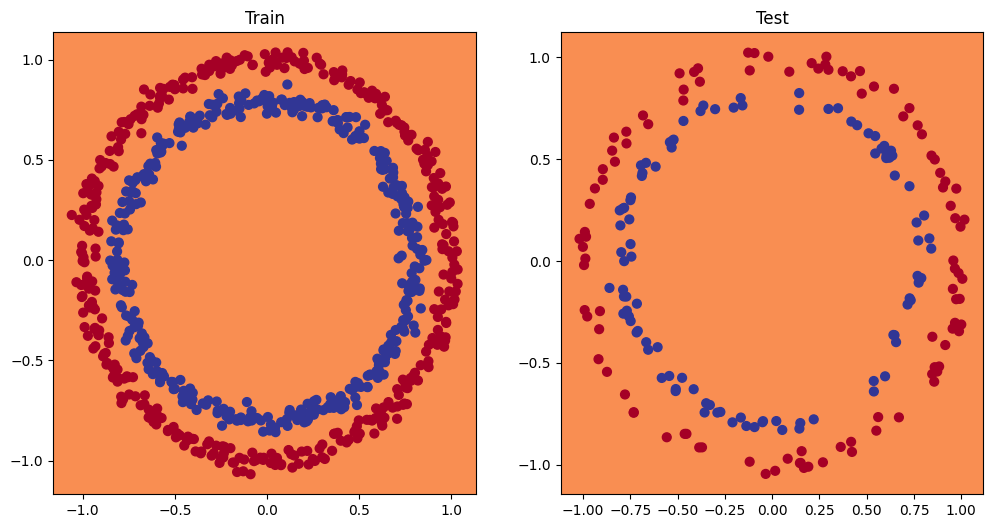

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show();

In [ ]:
history.history

{'loss': [0.7059582471847534,
  0.6954890489578247,
  0.6934805512428284,
  0.69330233335495,
  0.6933495998382568,
  0.6936879754066467,
  0.6931257843971252,
  0.6932708621025085,
  0.6935479044914246,
  0.6932628750801086,
  0.693539559841156,
  0.6937857866287231,
  0.6933318972587585,
  0.6932477355003357,
  0.6935392022132874,
  0.6932250261306763,
  0.6935002207756042,
  0.693278968334198,
  0.6936858296394348,
  0.6933204531669617,
  0.6932299137115479,
  0.6932860016822815,
  0.6932497620582581,
  0.6932926177978516,
  0.6933479905128479],
 'accuracy': [0.45875000953674316,
  0.4925000071525574,
  0.4987500011920929,
  0.49125000834465027,
  0.5012500286102295,
  0.4737499952316284,
  0.4962500035762787,
  0.5012500286102295,
  0.5012500286102295,
  0.48124998807907104,
  0.48374998569488525,
  0.4962500035762787,
  0.47874999046325684,
  0.48875001072883606,
  0.4712499976158142,
  0.5012500286102295,
  0.5012500286102295,
  0.48124998807907104,
  0.48124998807907104,
  0.448

In [ ]:
pd.DataFrame(history.history)


,loss,accuracy
0,0.705958,0.45875
1,0.695489,0.49250
2,0.693481,0.49875
3,0.693302,0.49125
4,0.693350,0.50125
5,0.693688,0.47375
6,0.693126,0.49625
7,0.693271,0.50125
8,0.693548,0.50125
9,0.693263,0.48125


Text(0.5, 1.0, 'Model_8 loss curves')

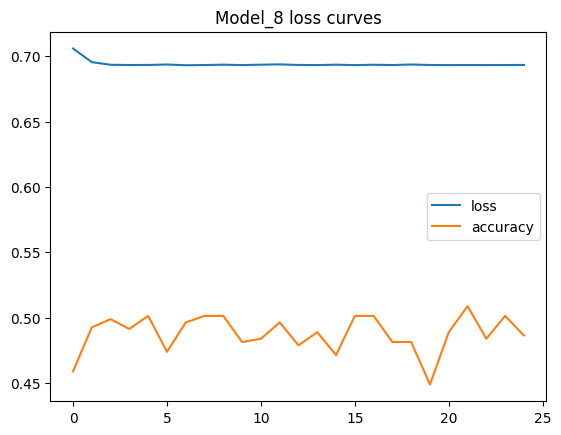

In [ ]:
pd.DataFrame(history.history).plot()
plt.title('Model_8 loss curves')

## Optimize learning rate

In [ ]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential ([
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_9.compile(loss='binary_crossentropy', optimizer = tf.keras.optimizers.Adam() , metrics =['accuracy'])

# Learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history = model_9.fit(X_train,y_train ,epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6957 - accuracy: 0.5025 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.5013 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.5050 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.5038 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.5025 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.5125 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.5088 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.5075 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

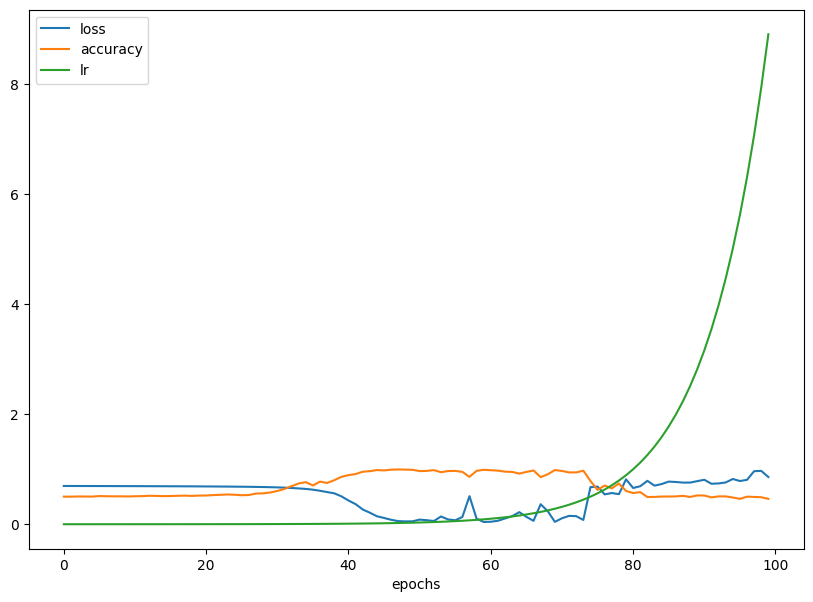

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,7),xlabel='epochs');


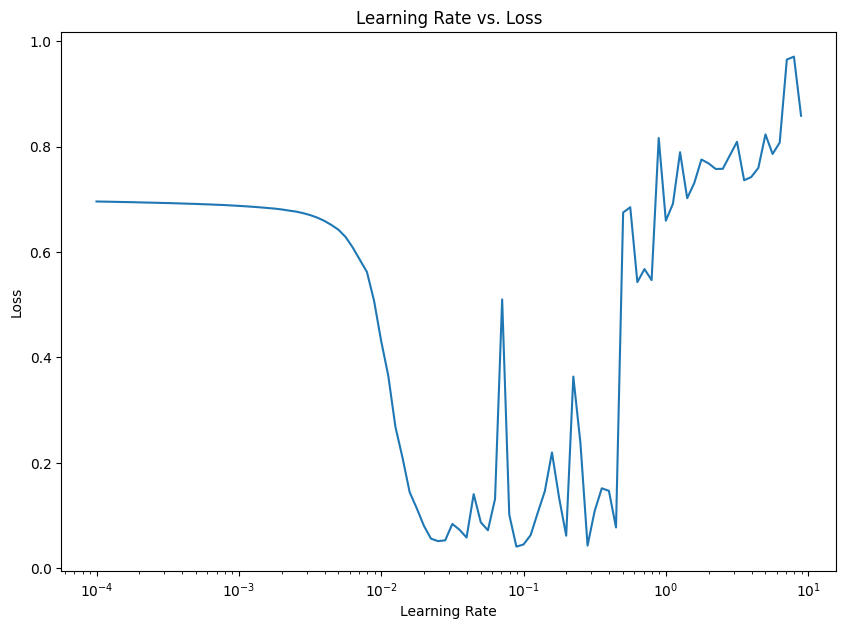

In [ ]:
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history.history.get('loss'))
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title('Learning Rate vs. Loss')
plt.show();

In [ ]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential ([
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_10.compile(loss='binary_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate=0.02) , metrics =['accuracy'])


history = model_10.fit(X_train,y_train ,epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 4ms/step - loss: 0.6802 - accuracy: 0.5913
Epoch 2/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6627 - accuracy: 0.6275
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6262 - accuracy: 0.6650
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5403 - accuracy: 0.8000
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4029 - accuracy: 0.8963
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2520 - accuracy: 0.9650
Epoch 7/20
25/25 [==============================] - 0s 4ms/step - loss: 0.1558 - accuracy: 0.9925
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.1020 - accuracy: 0.9975
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0800 - accuracy: 0.9950
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0595 - accuracy: 0.9987
Epoch 11/20
25/25 [

In [ ]:
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0181 - accuracy: 0.9950


[0.018097061663866043, 0.9950000047683716]

313/313 [==============================] - 0s 1ms/step


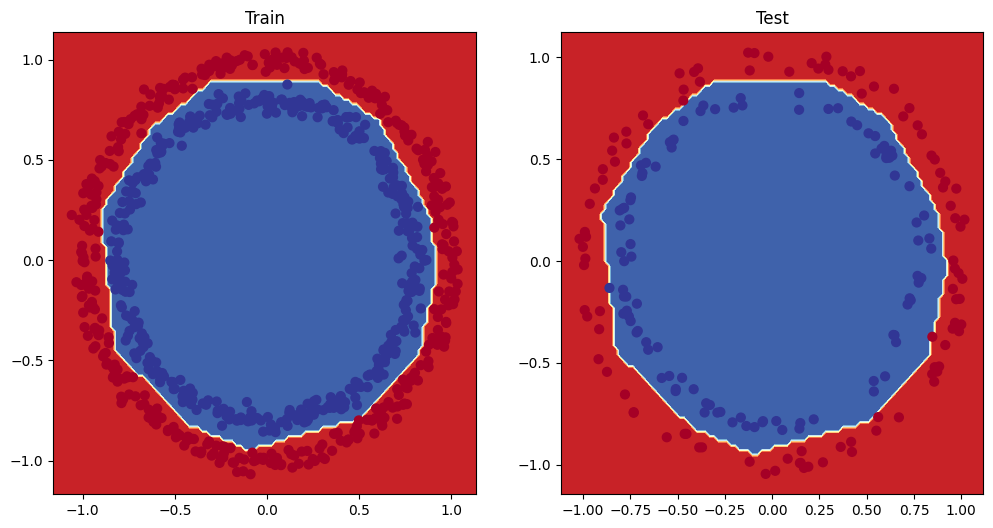

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_10, X = X_train, y=y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_10, X = X_test, y=y_test)
plt.show();

## More classification evaluation methods

In [ ]:
loss, accuracy = model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0181 - accuracy: 0.9950


### Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

y_preds = model_10.predict(X_test)
y_preds

7/7 [==============================] - 0s 3ms/step


array([[9.9371785e-01],
       [9.9997485e-01],
       [9.9978322e-01],
       [9.9886477e-01],
       [2.4991328e-02],
       [1.4922968e-02],
       [9.8227644e-01],
       [6.2215969e-04],
       [9.9938840e-01],
       [9.0508600e-04],
       [9.7758138e-01],
       [2.1355517e-01],
       [9.9978054e-01],
       [9.7280872e-01],
       [9.9985880e-01],
       [9.9972695e-01],
       [9.9936569e-01],
       [9.7643465e-01],
       [6.2117376e-04],
       [9.9709100e-01],
       [1.2811784e-02],
       [9.6500093e-01],
       [9.9979770e-01],
       [9.9931300e-01],
       [1.1826144e-03],
       [9.7002268e-01],
       [9.9443585e-01],
       [6.0327305e-03],
       [1.5222987e-04],
       [9.9862576e-01],
       [1.6294913e-04],
       [9.4778132e-01],
       [9.9964863e-01],
       [2.0555982e-03],
       [4.3899272e-02],
       [9.6812624e-01],
       [9.9698472e-01],
       [9.9879414e-01],
       [9.9988198e-01],
       [9.9618155e-01],
       [9.9812883e-01],
       [9.806835

In [ ]:
tf.round(y_preds)

<tf.Tensor: shape=(200, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
 

In [ ]:
confusion_matrix(y_test, tf.round(y_preds))

array([[101,   0],
       [  1,  98]])

In [ ]:
import itertools

figsize=(10,10)

cm = confusion_matrix(y_test, tf.round(y_preds))

cm_norm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
cm_norm

array([[1.        , 0.        ],
       [0.01010101, 0.98989899]])

In [ ]:
cm.shape
n_classes = cm.shape[0]

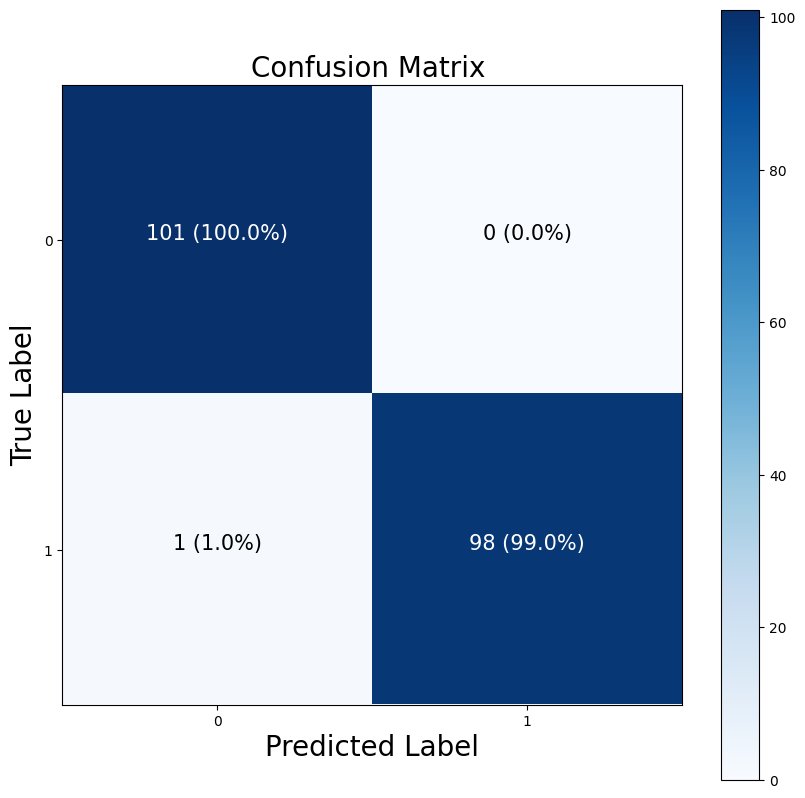

In [ ]:
fig, ax =plt.subplots(figsize=figsize)

cax= ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

classes = False
if classes:
  labels= classes
else:
  labels = np.arange(cm.shape[0])

ax.set(title="Confusion Matrix ",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)


threshold = (cm.max()+cm.min())/2

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i, f'{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)',horizontalalignment='center', color = 'white' if cm[i,j] > threshold else 'black', size = 15 )

## Mutli-class classification



In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(f'Training sample:\n{train_data[0]}\n')
print(f'Training label:\n{train_labels[0]}\n')

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# Data shape
train_data[0].shape, train_labels[0].shape

((28, 28), ())

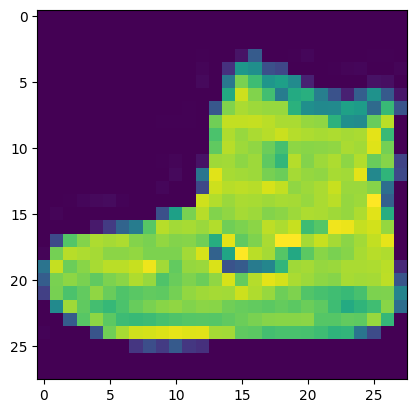

In [ ]:
# Plot sample image
plt.imshow(train_data[0]);

In [ ]:
class_names={
    0:'T-shirt/top',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle boot'
}

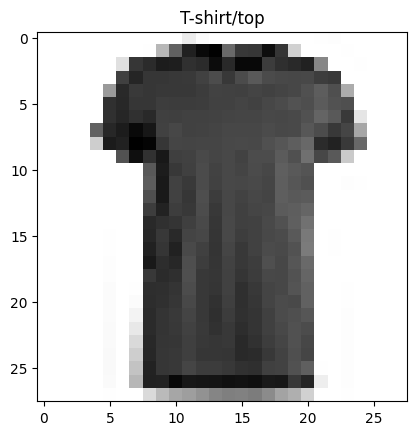

In [ ]:
plt.imshow(train_data[17], cmap=plt.cm.binary)
plt.title(class_names[train_labels[17]]);

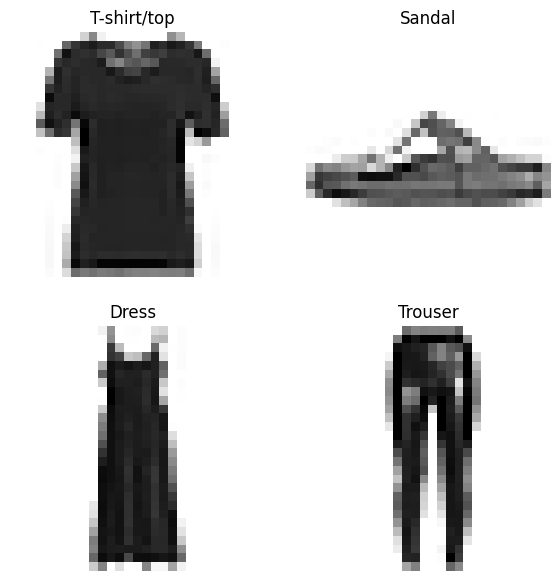

In [ ]:
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [ ]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential ([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer = tf.keras.optimizers.Adam() , metrics =['accuracy'])


history = model_11.fit(train_data, train_labels ,epochs=10, validation_data = (test_data, test_labels) )


Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.4102 - accuracy: 0.0979 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [ ]:
model_11.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 4)                 3140      
                                                                 
 dense_27 (Dense)            (None, 4)                 20        
                                                                 
 dense_28 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_data.min(), train_data.max()

(0, 255)

In [ ]:
# Normalize the data
train_data_norm = train_data/float(train_data.max())
test_data_norm = test_data/float(train_data.max())

In [ ]:
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential ([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer = tf.keras.optimizers.Adam() , metrics =['accuracy'])


history_norm = model_12.fit(train_data_norm, train_labels ,epochs=10, validation_data = (test_data_norm, test_labels) )


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3209 - accuracy: 0.4724 - val_loss: 1.0555 - val_accuracy: 0.5657
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9821 - accuracy: 0.6025 - val_loss: 0.9625 - val_accuracy: 0.6055
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9131 - accuracy: 0.6254 - val_loss: 0.9061 - val_accuracy: 0.6242
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8786 - accuracy: 0.6339 - val_loss: 0.8841 - val_accuracy: 0.6313
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8566 - accuracy: 0.6391 - val_loss: 0.8636 - val_accuracy: 0.6432
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8411 - accuracy: 0.6440 - val_loss: 0.8677 - val_accuracy: 0.6304
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8310 - accuracy: 0.6467 - val_loss: 0.8453 - val_accuracy:

In [ ]:
import pandas as pd

<Axes: title={'center': 'Normalized'}>

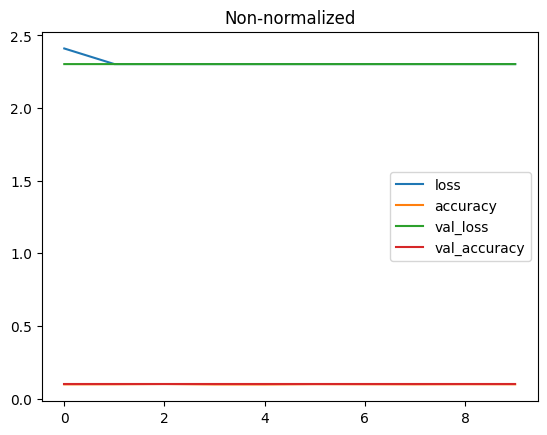

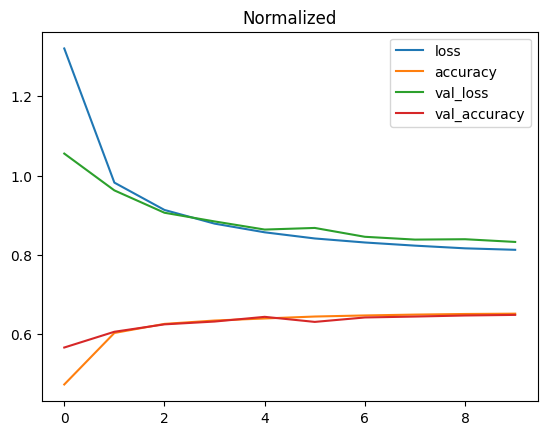

In [ ]:
pd.DataFrame(history.history).plot(title='Non-normalized')
pd.DataFrame(history_norm.history).plot(title='Normalized')

## Optimize learning rate

In [ ]:
tf.random.set_seed(42)


model_13 = tf.keras.Sequential ([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])


model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer = tf.keras.optimizers.Adam() , metrics =['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

history = model_13.fit(train_data_norm, train_labels ,epochs=40, validation_data = (test_data_norm, test_labels), callbacks = [lr_scheduler] )

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1074 - accuracy: 0.5939 - val_loss: 0.7581 - val_accuracy: 0.7332 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6960 - accuracy: 0.7560 - val_loss: 0.6947 - val_accuracy: 0.7539 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6568 - accuracy: 0.7672 - val_loss: 0.6618 - val_accuracy: 0.7671 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6397 - accuracy: 0.7736 - val_loss: 0.6473 - val_accuracy: 0.7684 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6294 - accuracy: 0.7756 - val_loss: 0.6414 - val_accuracy: 0.7707 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6223 - accuracy: 0.7805 - val_loss: 0.6626 - val_accuracy: 0.7650 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 7s

Text(0, 0.5, 'Loss')

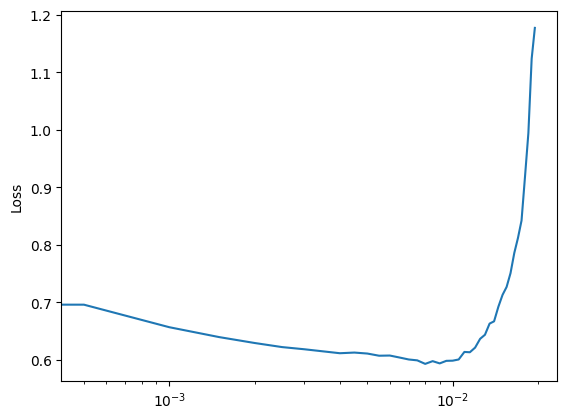

In [ ]:
lrs= 1e-3 * (10*tf.range(40)/20)
plt.semilogx(lrs,history.history.get('loss'))
plt.ylabel('Loss')

In [ ]:
tf.random.set_seed(42)


model_14 = tf.keras.Sequential ([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])


model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer = tf.keras.optimizers.Adam() , metrics =['accuracy'])


history = model_14.fit(train_data_norm, train_labels ,epochs=20, validation_data = (test_data_norm, test_labels), callbacks = [lr_scheduler] )

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3550 - accuracy: 0.4426 - val_loss: 1.0684 - val_accuracy: 0.5800 - lr: 0.0010
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8874 - accuracy: 0.6671 - val_loss: 0.7450 - val_accuracy: 0.7345 - lr: 0.0011
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6782 - accuracy: 0.7601 - val_loss: 0.6558 - val_accuracy: 0.7739 - lr: 0.0013
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6148 - accuracy: 0.7853 - val_loss: 0.6193 - val_accuracy: 0.7867 - lr: 0.0014
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5940 - accuracy: 0.7917 - val_loss: 0.6165 - val_accuracy: 0.7820 - lr: 0.0016
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5809 - accuracy: 0.7972 - val_loss: 0.6172 - val_accuracy: 0.7913 - lr: 0.0018
Epoch 7/20
1875/1875 [==============================] - 4s

In [ ]:
import itertools

figsize=(10,10)

def make_confusion_matrix(y_true,y_pred, classes=None, figsize=(10,10), text_size=10):
  
  cm = confusion_matrix(y_true, y_pred)

  cm_norm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]

  n_classes = cm.shape[0]

  fig, ax =plt.subplots(figsize=figsize)

  cax= ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title="Confusion Matrix ",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)


  threshold = (cm.max()+cm.min())/2

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, f'{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)',horizontalalignment='center', color = 'white' if cm[i,j] > threshold else 'black', size = text_size )

In [ ]:
y_probs = model_14.predict(test_data_norm)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_probs[:5]

array([[2.8938081e-11, 5.2811694e-18, 8.7143488e-19, 4.1419673e-17,
        4.0020046e-27, 3.7546119e-01, 1.7765514e-10, 4.7976963e-02,
        9.8924097e-03, 5.6666946e-01],
       [1.9373766e-03, 7.4847819e-08, 5.1136088e-01, 8.7148816e-05,
        3.2523951e-01, 1.5099660e-07, 1.4596456e-01, 8.3436280e-10,
        1.5410300e-02, 3.9694146e-13],
       [6.3515222e-04, 9.6412808e-01, 2.7150505e-03, 1.6585577e-02,
        2.0376827e-04, 1.3806349e-02, 1.4942579e-03, 1.2509867e-04,
        2.7905792e-04, 2.7587794e-05],
       [6.5828481e-04, 9.6446109e-01, 2.8064284e-03, 1.6616467e-02,
        2.1094151e-04, 1.3327097e-02, 1.5010959e-03, 1.1854997e-04,
        2.7247192e-04, 2.7643815e-05],
       [1.7536581e-01, 2.2415217e-05, 1.2362235e-01, 1.5639227e-02,
        4.3405883e-02, 3.0035476e-08, 6.2873554e-01, 1.5325741e-11,
        1.3208689e-02, 3.9019414e-09]], dtype=float32)

In [ ]:
y_pred = y_probs.argmax(axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

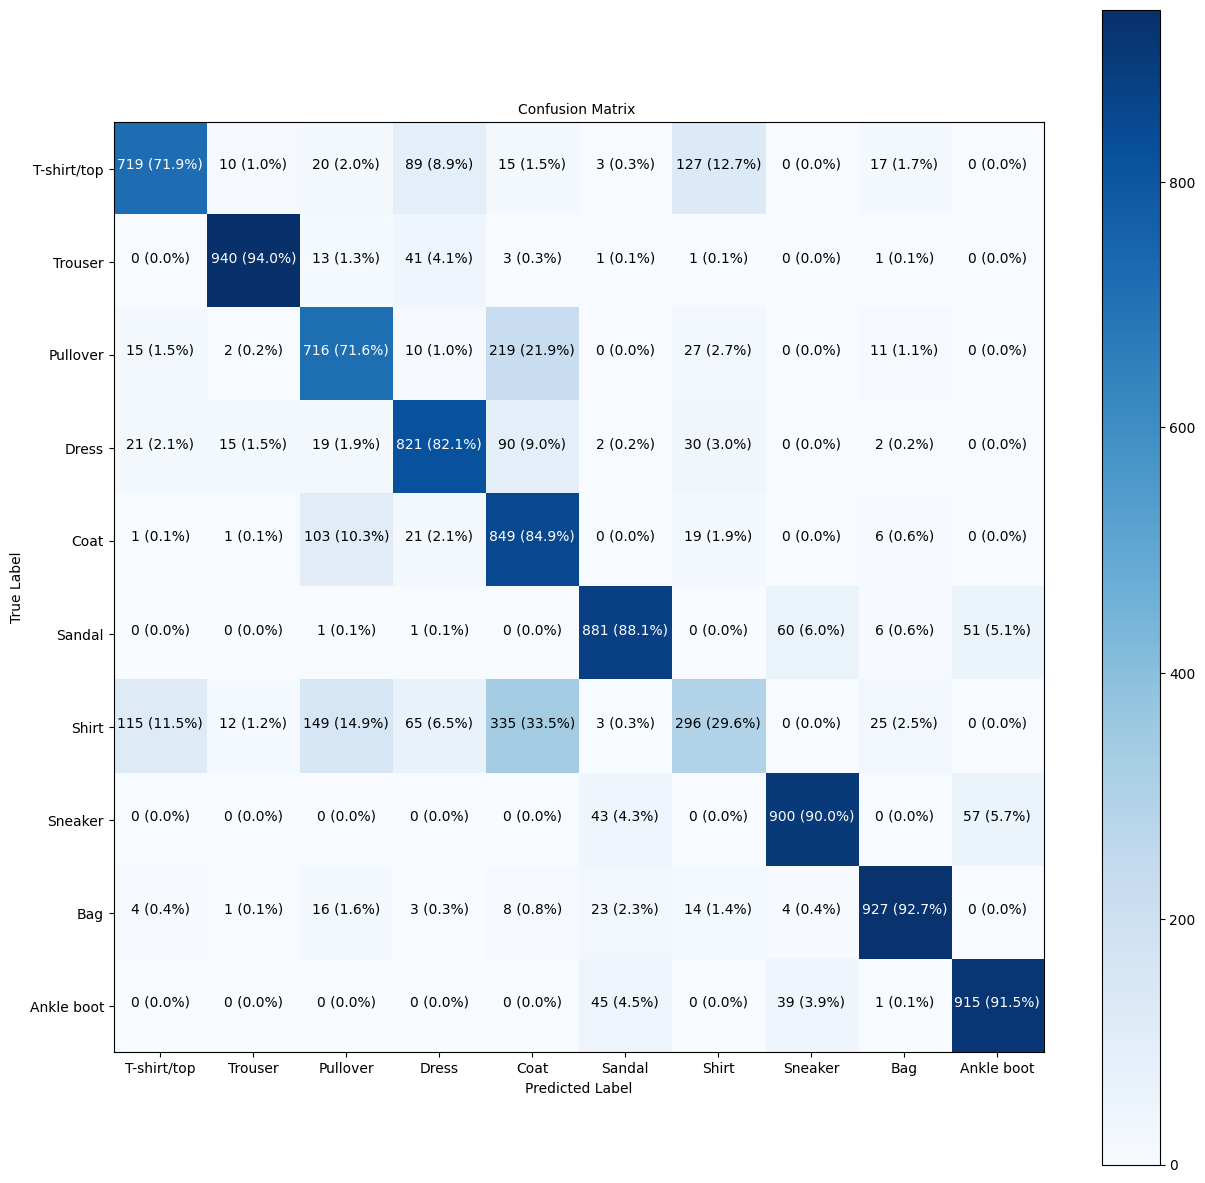

In [ ]:
make_confusion_matrix(y_true = test_labels, y_pred=y_pred , classes= class_names.values(), figsize=(15,15))

In [ ]:
def plot_random_image(model, images, true_labels, classes):
  '''
  Picks a  random image and plots it with the true label and predicated label
  '''

  i = random.randint(0, len(images))

  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap=plt.cm.binary)

  if pred_label == true_label:
    color='g'
  else:
    color = 'r'

  plt.xlabel(f"Pred: {pred_label} {100*tf.reduce_max(pred_probs):2.0f}% (True: {true_label}) ", color = color)



1/1 [==============================] - 0s 26ms/step


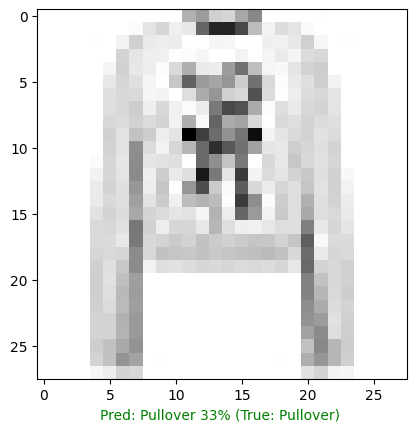

In [ ]:
plot_random_image(model=model_14, images = test_data_norm, true_labels = test_labels, classes = class_names)